# 1. Analysis

- In this step, I will continue to analyze each of the three datasets that I conducted exploratory analysis in the previous notebook respectively, and then find insights to recommend to the company.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Median household income by state in the U.S. 2013-2017.

In [2]:
#reading the data into dataframe
df1 = pd.read_csv("https://raw.githubusercontent.com/mhan1/Capstone-Project/master/median_household_income_by_state.csv")
df1.head(3)

,State,Income,Margin Of Error
0,Alabama,"$46,472",+/- $301
1,Alaska,"$76,114",+/- $979
2,Arizona,"$53,510",+/- $259


In [3]:
#checking the number of rows and columns
df1.shape

(53, 3)

In [4]:
df1

,State,Income,Margin Of Error
0,Alabama,"$46,472",+/- $301
1,Alaska,"$76,114",+/- $979
2,Arizona,"$53,510",+/- $259
3,Arkansas,"$43,813",+/- $401
4,California,"$67,169",+/- $192
5,Colorado,"$65,458",+/- $317
6,Connecticut,"$73,781",+/- $450
7,Delaware,"$63,036",+/- $738
8,District of Columbia,"$77,649","+/- $1,075"
9,Florida,"$50,883",+/- $140


In [5]:
#checking the last row information
df1[52:]

,State,Income,Margin Of Error
52,"Source(s): U.S. Census Bureau, 2013-2017 Ameri...",NaN,NaN


In [6]:
# drop the last row, which is not valid information 
df1 = df1.drop(df1.index[52])
df1.tail()

,State,Income,Margin Of Error
47,Virginia,"$68,766",+/- $319
48,Washington,"$66,174",+/- $272
49,West Virginia,"$44,061",+/- $439
50,Wisconsin,"$56,759",+/- $213
51,Wyoming,"$60,938",+/- $836


In [7]:
#checking the number of rows and columns
df1.shape

(52, 3)

In [8]:
#checking the column names
df1.columns

Index(['State', 'Income', 'Margin Of Error'], dtype='object')

In [9]:
#checking the unique values in the 'State' column
df1['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [10]:
#checking the number of states in the dataframe
len(df1['State'])

52

In [11]:
#checking the unique values in the "Income" column
df1['Income'].unique()

array(['$46,472 ', '$76,114 ', '$53,510 ', '$43,813 ', '$67,169 ',
       '$65,458 ', '$73,781 ', '$63,036 ', '$77,649 ', '$50,883 ',
       '$52,977 ', '$74,923 ', '$50,985 ', '$61,229 ', '$52,182 ',
       '$56,570 ', '$55,477 ', '$46,535 ', '$46,710 ', '$53,024 ',
       '$78,916 ', '$74,167 ', '$52,668 ', '$65,699 ', '$42,009 ',
       '$51,542 ', '$50,801 ', '$56,675 ', '$55,434 ', '$71,305 ',
       '$76,475 ', '$46,718 ', '$62,765 ', '$50,320 ', '$61,285 ',
       '$52,407 ', '$49,767 ', '$56,119 ', '$56,951 ', '$19,775 ',
       '$61,043 ', '$48,781 ', '$54,126 ', '$48,708 ', '$57,051 ',
       '$65,325 ', '$57,808 ', '$68,766 ', '$66,174 ', '$44,061 ',
       '$56,759 ', '$60,938 '], dtype=object)

In [12]:
#checking the unique values in the "Margin Of Error" column
df1['Margin Of Error'].unique()

array(['+/- $301', '+/- $979', '+/- $259', '+/- $401', '+/- $192',
       '+/- $317', '+/- $450', '+/- $738', '+/- $1,075', '+/- $140',
       '+/- $282', '+/- $736', '+/- $368', '+/- $190', '+/- $200',
       '+/- $303', '+/- $288', '+/- $353', '+/- $513', '+/- $380',
       '+/- $180', '+/- $249', '+/- $278', '+/- $215', '+/- $479',
       '+/- $392', '+/- $349', '+/- $733', '+/- $425', '+/- $408',
       '+/- $225', '+/- $204', '+/- $669', '+/- $153', '+/- $240',
       '+/- $370', '+/- $205', '+/- $176', '+/- $763', '+/- $531',
       '+/- $242', '+/- $183', '+/- $407', '+/- $741', '+/- $319',
       '+/- $272', '+/- $439', '+/- $213', '+/- $836'], dtype=object)

In [13]:
# checking if there is null value in each column
df1.isnull().any(axis=0)

State              False
Income             False
Margin Of Error    False
dtype: bool

In [14]:
#brief summary of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
State              52 non-null object
Income             52 non-null object
Margin Of Error    52 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [15]:
#removing unwanted parts in the 'Margin of Error' column and then converting into numeric datatype.
df1['Margin Of Error'] = df1['Margin Of Error'].map(lambda x: x.lstrip('+/- $'))
df1['Margin Of Error'] = df1['Margin Of Error'].str.replace(',', '')
df1['Margin Of Error'] = df1['Margin Of Error'].astype(float)
df1['Margin Of Error'].head()

0    301.0
1    979.0
2    259.0
3    401.0
4    192.0
Name: Margin Of Error, dtype: float64

In [16]:
df1['Margin Of Error'].describe()

count      52.000000
mean      392.884615
std       219.597819
min       140.000000
25%       236.250000
50%       334.000000
75%       441.750000
max      1075.000000
Name: Margin Of Error, dtype: float64

In [17]:
df1['Income'] = df1['Income'].replace({'\$': '', ',': ''}, regex=True)
df1['Income'] = df1['Income'].astype(float)
df1['Income'].head()

0    46472.0
1    76114.0
2    53510.0
3    43813.0
4    67169.0
Name: Income, dtype: float64

In [18]:
df1['Income'].describe()

count       52.000000
mean     57496.826923
std      11115.944598
min      19775.000000
25%      50862.500000
50%      56344.500000
75%      65358.250000
max      78916.000000
Name: Income, dtype: float64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 3 columns):
State              52 non-null object
Income             52 non-null float64
Margin Of Error    52 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [20]:
df1.describe()

,Income,Margin Of Error
count,52.000000,52.000000
mean,57496.826923,392.884615
std,11115.944598,219.597819
min,19775.000000,140.000000
25%,50862.500000,236.250000
50%,56344.500000,334.000000
75%,65358.250000,441.750000
max,78916.000000,1075.000000


In [21]:
df1.head(10)

,State,Income,Margin Of Error
0,Alabama,46472.0,301.0
1,Alaska,76114.0,979.0
2,Arizona,53510.0,259.0
3,Arkansas,43813.0,401.0
4,California,67169.0,192.0
5,Colorado,65458.0,317.0
6,Connecticut,73781.0,450.0
7,Delaware,63036.0,738.0
8,District of Columbia,77649.0,1075.0
9,Florida,50883.0,140.0


In [22]:
#sorting the dataframe based on Median Household Income.
df1 = df1.sort_values(by='Income', ascending=False)
df1

,State,Income,Margin Of Error
20,Maryland,78916.0,380.0
8,District of Columbia,77649.0,1075.0
30,New Jersey,76475.0,425.0
1,Alaska,76114.0,979.0
11,Hawaii,74923.0,736.0
21,Massachusetts,74167.0,380.0
6,Connecticut,73781.0,450.0
29,New Hampshire,71305.0,733.0
47,Virginia,68766.0,319.0
4,California,67169.0,192.0


In [23]:
#ranking the State based on Income and then combining with the sorted dataframe. 
rank_df1 = df1['Income'].rank(ascending=False)
result1 = pd.concat([df1, rank_df1], axis=1)
result1['Income_Ranking'] = rank_df1
result1

,State,Income,Margin Of Error,Income,Income_Ranking
20,Maryland,78916.0,380.0,1.0,1.0
8,District of Columbia,77649.0,1075.0,2.0,2.0
30,New Jersey,76475.0,425.0,3.0,3.0
1,Alaska,76114.0,979.0,4.0,4.0
11,Hawaii,74923.0,736.0,5.0,5.0
21,Massachusetts,74167.0,380.0,6.0,6.0
6,Connecticut,73781.0,450.0,7.0,7.0
29,New Hampshire,71305.0,733.0,8.0,8.0
47,Virginia,68766.0,319.0,9.0,9.0
4,California,67169.0,192.0,10.0,10.0


- As shown above table, the top five wealthy states in US are Maryland, District of Columbia, New Jersey, Alaska, Hawaii. The bottom five unwealthy states in US are Puerto Rico, Mississippi, Arkansas, West Virginia, Alabama. I will further anlyze the supply of dentist per 100,000 population in each state to see if there is discrepancy with this result. Also, I will analyze which practice areas are increased in US as well.

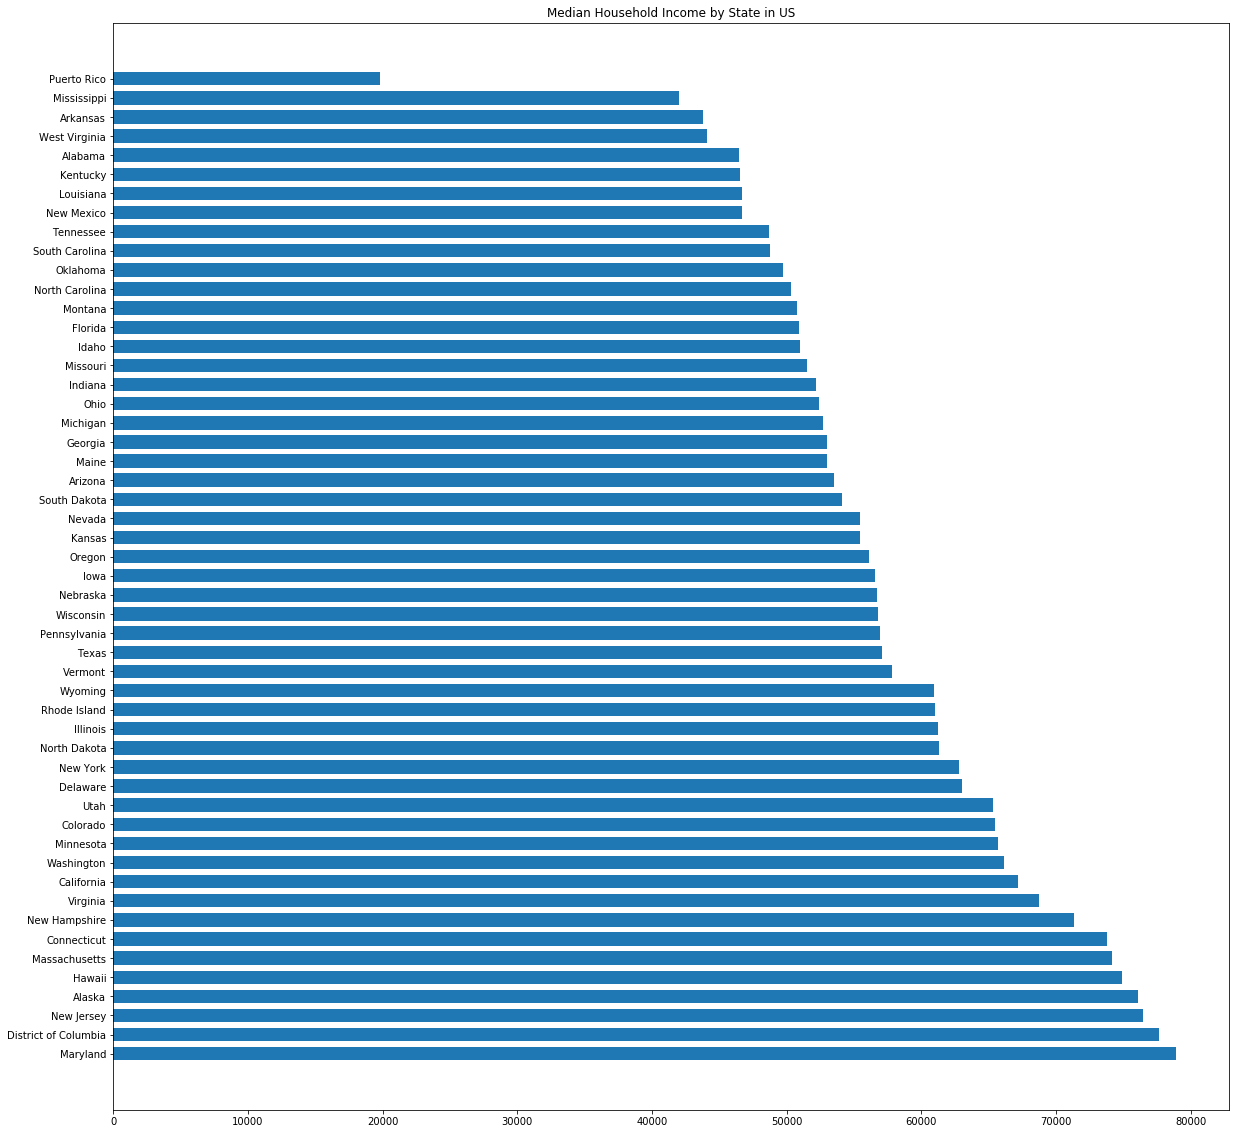

In [45]:
#visualizing the result using bar chart.
plt.subplots(figsize=(20,20))

State = df1['State']
Income = df1['Income']

plt.barh(State, Income, height=0.7)
plt.title('Median Household Income by State in US')

plt.show()

### 2) Dentists per 100,000 population in each state - dentists working in dentistry 2001-2018.

In [25]:
#reading the data into dataframe
df2 = pd.read_csv("https://raw.githubusercontent.com/mhan1/Capstone-Project/master/supply_of_dentists_in_us.csv")
df2.head(3)

,Unnamed: 0,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,42.28,41.65,41.70,41.54,40.86,41.24,41.24,41.27,41.36,42.41,42.64,43.73,44.14,43.86,43.74,43.23,40.43,41.78
1,Alaska,72.59,70.06,71.10,71.74,74.37,72.86,74.82,76.37,77.26,77.44,77.42,79.27,78.83,79.86,82.03,76.20,79.48,81.50
2,Arizona,44.54,44.83,47.13,48.30,50.09,50.64,50.98,52.67,53.54,53.83,53.62,53.85,54.45,53.58,53.69,53.66,53.85,54.42


In [26]:
#brief summary of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
Unnamed: 0    51 non-null object
2001          51 non-null float64
2002          51 non-null float64
2003          51 non-null float64
2004          51 non-null float64
2005          51 non-null float64
2006          51 non-null float64
2007          51 non-null float64
2008          51 non-null float64
2009          51 non-null float64
2010          51 non-null float64
2011          51 non-null float64
2012          51 non-null float64
2013          51 non-null float64
2014          51 non-null float64
2015          51 non-null float64
2016          51 non-null float64
2017          51 non-null float64
2018          51 non-null float64
dtypes: float64(18), object(1)
memory usage: 7.6+ KB


In [27]:
# checking if there is null value in each column
df2.isnull().any(axis=0)

Unnamed: 0    False
2001          False
2002          False
2003          False
2004          False
2005          False
2006          False
2007          False
2008          False
2009          False
2010          False
2011          False
2012          False
2013          False
2014          False
2015          False
2016          False
2017          False
2018          False
dtype: bool

In [28]:
#checking the column names
df2.columns

Index(['Unnamed: 0', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [29]:
#changing the column name into appropriate name.
df2.rename(columns={'Unnamed: 0':'state'}, 
                 inplace=True)
df2.head(3)

,state,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Alabama,42.28,41.65,41.70,41.54,40.86,41.24,41.24,41.27,41.36,42.41,42.64,43.73,44.14,43.86,43.74,43.23,40.43,41.78
1,Alaska,72.59,70.06,71.10,71.74,74.37,72.86,74.82,76.37,77.26,77.44,77.42,79.27,78.83,79.86,82.03,76.20,79.48,81.50
2,Arizona,44.54,44.83,47.13,48.30,50.09,50.64,50.98,52.67,53.54,53.83,53.62,53.85,54.45,53.58,53.69,53.66,53.85,54.42


In [30]:
#checking the number of rows and columns
df2.shape

(51, 19)

In [31]:
#checking the unique values in the 'state' column
df2['state'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [32]:
#checking the number of states in the df2 dataframe
len(df2['state'])

51

- Unlike the df1 dataframe 'State' column, df2 dataframe 'state' column does not include Puerto Rico, thereby having only 51 states instead of 52 states.

In [33]:
#transposing the dataframe
df2 = df2.T
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2001,42.28,72.59,44.54,38.16,65.78,64.13,75.68,43.48,114.36,49.25,...,46.44,50.83,45.03,61.04,56.68,57.01,64.94,48.74,57.15,53.77
2002,41.65,70.06,44.83,38.14,72.75,63.09,74.36,43.91,110.44,48.41,...,47.37,50.67,44.31,59.88,58.01,54.76,65.48,46.19,55.98,51
2003,41.7,71.1,47.13,39.12,72.78,64.34,74.39,45.35,106.07,49.78,...,46.88,48.79,44.7,62.07,58.91,55.6,66.43,45.91,53.71,52.04
2004,41.54,71.74,48.3,38.77,74.1,64.2,74.17,44.17,104.98,49.01,...,47.38,48.99,44.45,54.17,57.43,55.21,66.42,47.24,54.93,52.64


In [34]:
#converting the first row into column header.
df2.columns = df2.iloc[0]
df2.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2001,42.28,72.59,44.54,38.16,65.78,64.13,75.68,43.48,114.36,49.25,...,46.44,50.83,45.03,61.04,56.68,57.01,64.94,48.74,57.15,53.77
2002,41.65,70.06,44.83,38.14,72.75,63.09,74.36,43.91,110.44,48.41,...,47.37,50.67,44.31,59.88,58.01,54.76,65.48,46.19,55.98,51
2003,41.7,71.1,47.13,39.12,72.78,64.34,74.39,45.35,106.07,49.78,...,46.88,48.79,44.7,62.07,58.91,55.6,66.43,45.91,53.71,52.04
2004,41.54,71.74,48.3,38.77,74.1,64.2,74.17,44.17,104.98,49.01,...,47.38,48.99,44.45,54.17,57.43,55.21,66.42,47.24,54.93,52.64


In [35]:
#dropping the first row
df2 = df2.drop(df2.index[0])
df2

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2001,42.28,72.59,44.54,38.16,65.78,64.13,75.68,43.48,114.36,49.25,...,46.44,50.83,45.03,61.04,56.68,57.01,64.94,48.74,57.15,53.77
2002,41.65,70.06,44.83,38.14,72.75,63.09,74.36,43.91,110.44,48.41,...,47.37,50.67,44.31,59.88,58.01,54.76,65.48,46.19,55.98,51
2003,41.7,71.1,47.13,39.12,72.78,64.34,74.39,45.35,106.07,49.78,...,46.88,48.79,44.7,62.07,58.91,55.6,66.43,45.91,53.71,52.04
2004,41.54,71.74,48.3,38.77,74.1,64.2,74.17,44.17,104.98,49.01,...,47.38,48.99,44.45,54.17,57.43,55.21,66.42,47.24,54.93,52.64
2005,40.86,74.37,50.09,39.12,74.54,64.75,73.05,43.9,101.74,48.64,...,46.81,48.91,44.59,60.83,56.5,54.89,67.04,45.59,51.39,53.1
2006,41.24,72.86,50.64,39.44,73.32,65.74,73.18,44.34,106.19,47.91,...,49.04,48.35,44.21,61.77,55.07,56.19,66.88,45.84,51.35,50.51
2007,41.24,74.82,50.98,38.68,75.94,66.51,72.35,43.71,105.85,49.09,...,49.01,48.67,45.43,64.25,56.3,57.45,67.72,45.75,51.88,48.8
2008,41.27,76.37,52.67,39,76.5,65.95,72.6,43.9,106.16,49.11,...,50.93,48.15,45.59,65.19,57.04,58.1,67.83,46.19,52.65,48.16
2009,41.36,77.26,53.54,39.56,77.31,66.75,72.15,44.63,104.18,49.7,...,49.93,47.65,46.04,64.48,55.54,58.68,68.96,46.81,52.9,47.69
2010,42.41,77.44,53.83,39.64,77.1,67.88,73.42,45.21,100.71,50.15,...,51.34,48.19,47.48,65.92,55.93,59.02,70.65,46.25,52.47,49.68


In [36]:
df2.columns

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [37]:
len(df2.columns)

51

In [38]:
#brief summary of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 2001 to 2018
Data columns (total 51 columns):
Alabama                 18 non-null object
Alaska                  18 non-null object
Arizona                 18 non-null object
Arkansas                18 non-null object
California              18 non-null object
Colorado                18 non-null object
Connecticut             18 non-null object
Delaware                18 non-null object
District of Columbia    18 non-null object
Florida                 18 non-null object
Georgia                 18 non-null object
Hawaii                  18 non-null object
Idaho                   18 non-null object
Illinois                18 non-null object
Indiana                 18 non-null object
Iowa                    18 non-null object
Kansas                  18 non-null object
Kentucky                18 non-null object
Louisiana               18 non-null object
Maine                   18 non-null object
Maryland                18 non-null o

In [39]:
# convert all columns of the dataframe into numeric data type.
df2 = df2.apply(pd.to_numeric)

In [40]:
df2.dtypes

state
Alabama                 float64
Alaska                  float64
Arizona                 float64
Arkansas                float64
California              float64
Colorado                float64
Connecticut             float64
Delaware                float64
District of Columbia    float64
Florida                 float64
Georgia                 float64
Hawaii                  float64
Idaho                   float64
Illinois                float64
Indiana                 float64
Iowa                    float64
Kansas                  float64
Kentucky                float64
Louisiana               float64
Maine                   float64
Maryland                float64
Massachusetts           float64
Michigan                float64
Minnesota               float64
Mississippi             float64
Missouri                float64
Montana                 float64
Nebraska                float64
Nevada                  float64
New Hampshire           float64
New Jersey              float64
Ne

In [58]:
#descriptive statistics of the dataframe
df2.describe()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,42.172222,76.288889,51.537222,39.877222,75.372778,67.111667,74.447778,44.660000,104.448333,49.920556,...,50.531111,49.103333,47.734444,62.496111,56.718889,59.061111,68.900000,46.857222,54.621111,52.187222
std,1.138356,3.594548,3.278776,1.211833,2.926405,2.366027,1.556650,0.944333,3.486389,1.183392,...,2.716254,0.836801,3.208867,2.831730,0.980209,3.069980,2.328572,0.902420,2.135930,2.454863
min,40.430000,70.060000,44.540000,38.140000,65.780000,63.090000,72.150000,43.320000,100.680000,47.910000,...,46.440000,47.650000,44.210000,54.170000,55.070000,54.760000,64.940000,45.590000,51.350000,47.690000
25%,41.292500,73.237500,50.227500,39.030000,74.210000,64.997500,73.212500,43.902500,102.107500,49.095000,...,47.787500,48.632500,44.782500,61.080000,56.335000,56.395000,66.920000,46.190000,52.712500,50.632500
50%,41.740000,76.815000,53.560000,39.600000,76.515000,67.315000,74.375000,44.345000,103.465000,49.780000,...,51.135000,48.950000,46.760000,62.100000,56.650000,58.850000,69.675000,46.790000,54.975000,52.785000
75%,43.082500,79.160000,53.795000,41.020000,77.082500,68.877500,75.655000,45.315000,106.015000,50.722500,...,53.090000,49.485000,50.547500,64.772500,57.332500,62.395000,70.672500,47.612500,56.115000,53.685000
max,44.140000,82.030000,54.450000,42.110000,77.790000,70.410000,77.130000,46.320000,114.360000,52.050000,...,53.870000,50.830000,52.900000,65.920000,58.910000,63.120000,72.920000,48.740000,58.230000,55.790000


In [62]:
df2

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2001,42.28,72.59,44.54,38.16,65.78,64.13,75.68,43.48,114.36,49.25,...,46.44,50.83,45.03,61.04,56.68,57.01,64.94,48.74,57.15,53.77
2002,41.65,70.06,44.83,38.14,72.75,63.09,74.36,43.91,110.44,48.41,...,47.37,50.67,44.31,59.88,58.01,54.76,65.48,46.19,55.98,51.00
2003,41.70,71.10,47.13,39.12,72.78,64.34,74.39,45.35,106.07,49.78,...,46.88,48.79,44.70,62.07,58.91,55.60,66.43,45.91,53.71,52.04
2004,41.54,71.74,48.30,38.77,74.10,64.20,74.17,44.17,104.98,49.01,...,47.38,48.99,44.45,54.17,57.43,55.21,66.42,47.24,54.93,52.64
2005,40.86,74.37,50.09,39.12,74.54,64.75,73.05,43.90,101.74,48.64,...,46.81,48.91,44.59,60.83,56.50,54.89,67.04,45.59,51.39,53.10
2006,41.24,72.86,50.64,39.44,73.32,65.74,73.18,44.34,106.19,47.91,...,49.04,48.35,44.21,61.77,55.07,56.19,66.88,45.84,51.35,50.51
2007,41.24,74.82,50.98,38.68,75.94,66.51,72.35,43.71,105.85,49.09,...,49.01,48.67,45.43,64.25,56.30,57.45,67.72,45.75,51.88,48.80
2008,41.27,76.37,52.67,39.00,76.50,65.95,72.60,43.90,106.16,49.11,...,50.93,48.15,45.59,65.19,57.04,58.10,67.83,46.19,52.65,48.16
2009,41.36,77.26,53.54,39.56,77.31,66.75,72.15,44.63,104.18,49.70,...,49.93,47.65,46.04,64.48,55.54,58.68,68.96,46.81,52.90,47.69
2010,42.41,77.44,53.83,39.64,77.10,67.88,73.42,45.21,100.71,50.15,...,51.34,48.19,47.48,65.92,55.93,59.02,70.65,46.25,52.47,49.68


In [76]:
mean_column = []
def mean_dentist_no(df):
    columns = df.columns
    for column in columns:
        mean_value = df[column].mean()
        mean_column.append(mean_value)
    return mean_column

In [78]:
mean_column = mean_dentist_no(df2)
mean_column

[42.172222222222224,
 76.28888888888889,
 51.53722222222223,
 39.87722222222223,
 75.37277777777778,
 67.11166666666668,
 74.44777777777776,
 44.66,
 104.44833333333334,
 49.92055555555555,
 45.61166666666666,
 77.48611111111111,
 56.23111111111112,
 65.14444444444445,
 46.666666666666664,
 51.82333333333334,
 48.891111111111115,
 55.740555555555545,
 47.31388888888888,
 49.41,
 70.90055555555556,
 78.18388888888887,
 59.93777777777778,
 59.63166666666666,
 40.96555555555555,
 47.29055555555556,
 57.501666666666665,
 63.59055555555556,
 48.75166666666666,
 61.87944444444445,
 77.41055555555555,
 47.65555555555555,
 75.08944444444444,
 46.50611111111111,
 51.781666666666666,
 51.68111111111111,
 49.708333333333336,
 66.90222222222222,
 60.17666666666667,
 54.18499999999998,
 46.54055555555556,
 50.53111111111111,
 49.103333333333325,
 47.73444444444445,
 62.49611111111111,
 56.718888888888884,
 59.06111111111112,
 68.90000000000002,
 46.85722222222222,
 54.62111111111111,
 52.1872222222

### 3) Supply of Dentists in the U.S. by practice area 2001-2018.

In [42]:
#checking the number of rows and columns
df3.shape

NameError: name 'df3' is not defined

In [ ]:
#brief summary of the dataframe
df3.info()

In [ ]:
# checking if there is null value in each column
df3.isnull().any(axis=0)

In [ ]:
#checking the column names
df3.columns

In [ ]:
#changing the column name into appropriate name.
df3.rename(columns={'Unnamed: 0':'practice_area'}, 
                 inplace=True)
df3.head(3)

In [ ]:
#checking the unique values in the 'practice_area' column
df3['practice_area'].unique()

In [ ]:
#transposing the dataframe
df3 = df3.T
df3.head()

In [ ]:
#converting the first row into column header.
df3.columns = df3.iloc[0]
df3.head()

In [ ]:
#dropping the first row
df3 = df3.drop(df3.index[0])
df3.head()

In [ ]:
df3.columns

In [ ]:
len(df3.columns)

In [ ]:
#brief summary of the dataframe
df3.info()

In [ ]:
#list of columns
cols = ['General Practice', 'Oral and Maxillofacial Surgery', 'Endodontics',
       'Orthodontics and Dentofacial Orthopedics', 'Pediatric Dentistry',
       'Periodontics', 'Prosthodontics', 'Oral and Maxillofacial Pathology',
       'Public Health Dentistry', 'Oral and Maxillofacial Radiology']

# passing the columns to df.replace() to remove the comma(,)
df3[cols] = df3[cols].replace({',': ''}, regex=True)
df3 = df3.astype(float)
df3.head()

In [ ]:
#checking the datatype
df3.dtypes

In [ ]:
#descriptive satatistics of the dataframe
df3.describe()

- Now, I am ready to analyze all of these three dataframes in the next step. I will use descriptive statistics to rank respective variables to find insights and recommend them to the company.

# 2. Key findings & Recommendations